**Upload file**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving blackhole.jpg to blackhole.jpg


**Exercice 1: Getting Started with Python + OpenCV**

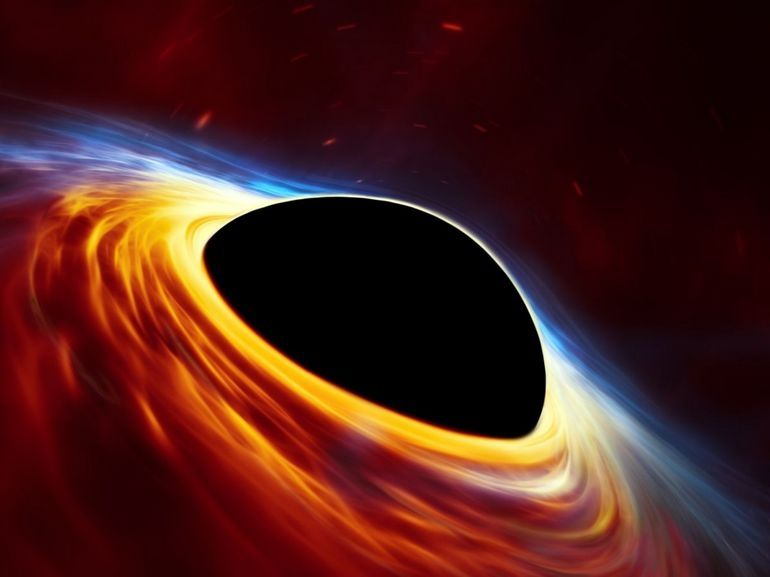

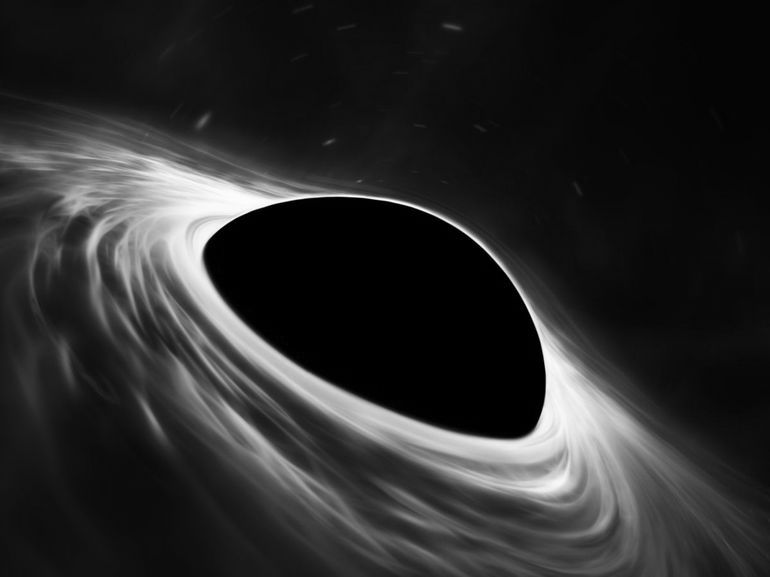

In [10]:
import cv2
from google.colab.patches import cv2_imshow

file = list(uploaded.keys())[0]

img = cv2.imread(file)
cv2_imshow(img)
gray = cv2.imread(file,0)
cv2_imshow(gray)

**Exercise 2: "Image Resolution"**

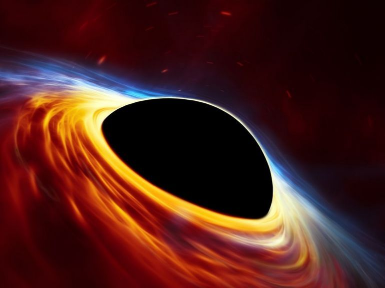

In [11]:
# percent by which the image is resized
scale_percent = 50
# calculate the 50 percent of original dimensions
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
# dsize
dsize = (width, height)
output = cv2.resize(img, dsize)
cv2_imshow(output)

For each pixel, the resulting grayscale level from the three values R, G, and B is x = (R+G+B)/3

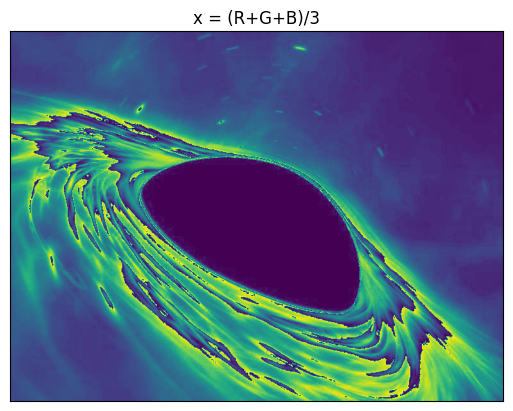

In [15]:
import numpy as np
from matplotlib import pyplot as plt

r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

x = np.array((r + g + b) / 3)
plt.imshow(x.tolist())
plt.title("x = (R+G+B)/3")
plt.xticks([]), plt.yticks([])
plt.show()

For each pixel, the resulting grayscale level from the three values R, G, and B is x = R0.299 + G0.587 + B*0.114

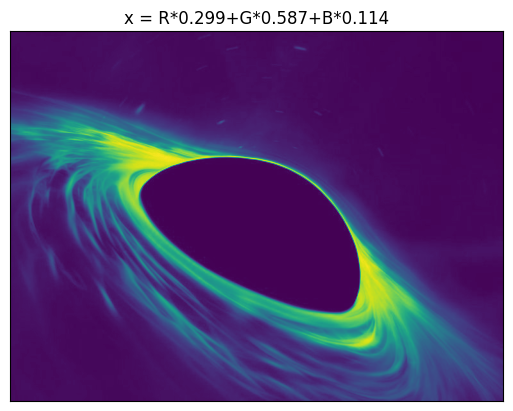

In [18]:
x = np.array((r * 0.299 + g * 0.587 + b * 0.114))
plt.imshow(x.tolist())
plt.title("x = R*0.299+G*0.587+B*0.114")
plt.xticks([]), plt.yticks([])
plt.show()

Use the cvtColor function from OpenCV

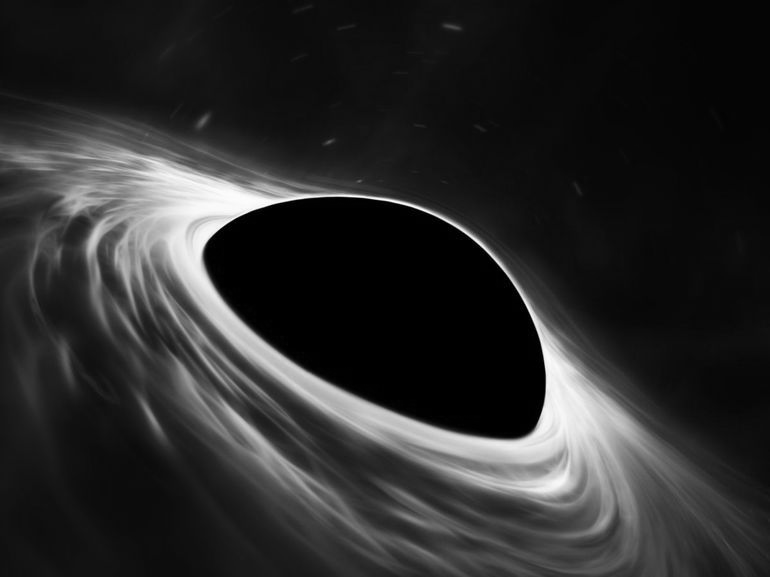

In [22]:
x = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(x)

**Exercise 4: Histogram of an Image**

Write the code that takes a grayscale image as input and calculates a list of size 256: in the first position (index 0), the number of black pixels (gray 0), in the second position (index 1), the number of gray 1 pixels, ..., in the last position (255), the number of white pixels (gray 255).

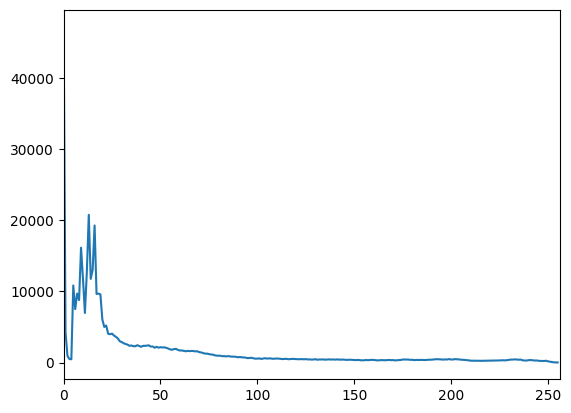

In [30]:
hist = np.bincount(gray.ravel(), minlength=256)
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

Calculate and visualize the histograms using the calcHist function from OpenCV

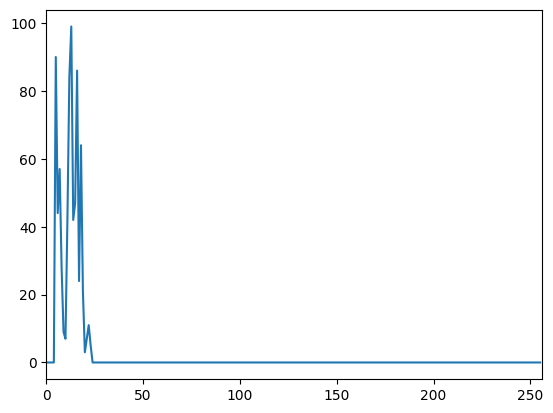

In [29]:
hist = cv2.calcHist(gray, [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

**Exercise 5: Contrast Enhancement**

Write the code to transform an input image using the convertScaleAbs transformation.

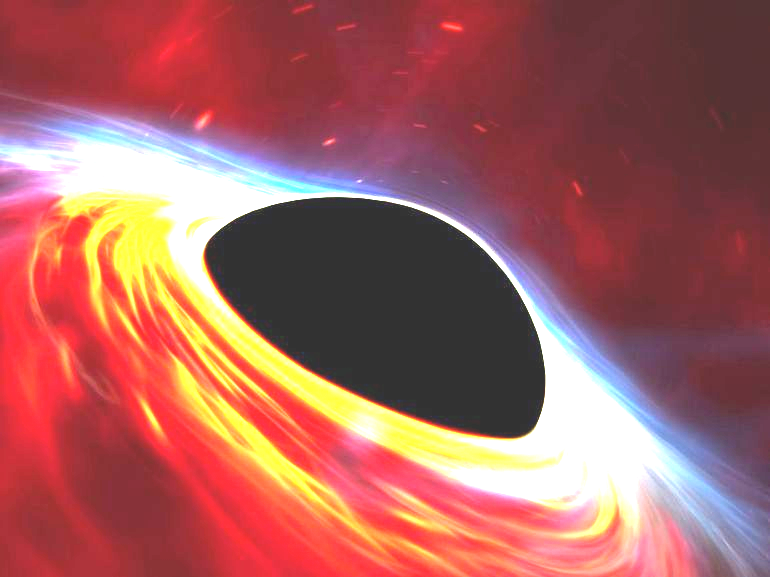

In [32]:
new_image = cv2.convertScaleAbs(img, alpha=2.2, beta=50)
cv2_imshow(new_image)

**Exercise 6: Thresholding**

Write the code to transform an input image using the 'adaptive thresholding' transformation.

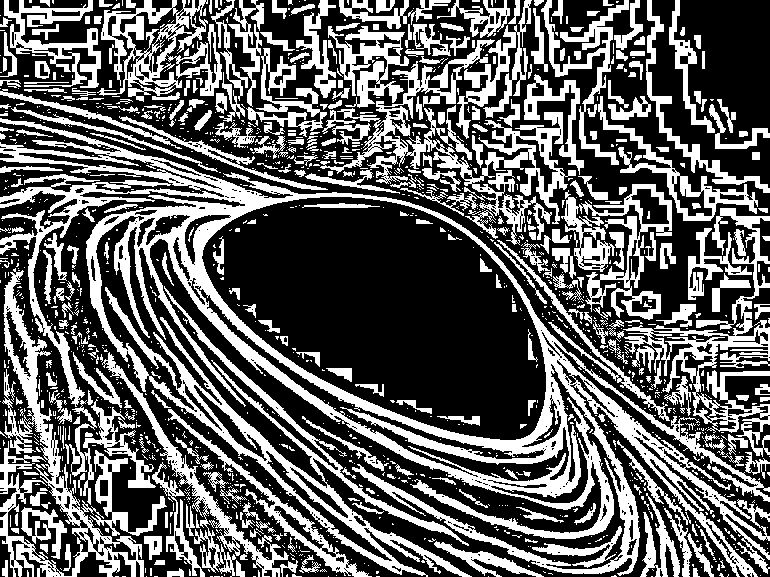

In [36]:
# Define the size of the local window for adaptive thresholding
window_size = 11  # Adjust this size as needed
# Iterate over image pixels and apply adaptive thresholding
thresholded_image = np.zeros_like(gray)
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        # Define the local region
        row_min = max(0, i - window_size // 2)
        row_max = min(gray.shape[0], i + window_size // 2 + 1)
        col_min = max(0, j - window_size // 2)
        col_max = min(gray.shape[1], j + window_size // 2 + 1)
        # Compute the local mean
        local_mean = np.mean(gray[row_min:row_max, col_min:col_max])
        # Apply adaptive thresholding
        if gray[i, j] > local_mean:
            thresholded_image[i, j] = 255  # White
        else:
            thresholded_image[i, j] = 0  # Black
cv2_imshow(thresholded_image)

Understand binarization functions in OpenCV

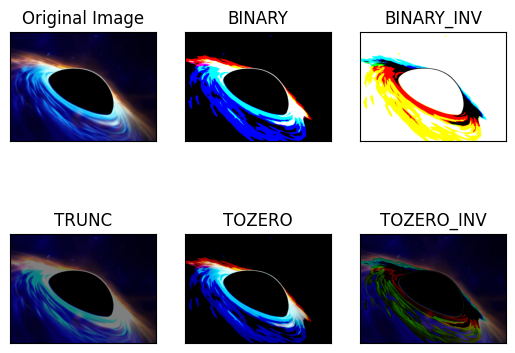

In [33]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
  plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])
plt.show()